In [6]:
import pandas as pd
import numpy as np



from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline



In [7]:
#load csv file data with headers

location = "datasets/DC_Properties.csv"
df = pd.read_csv(location)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()
#df.head?

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [8]:
df['BEDRM'].max()

24

In [10]:
df['BEDRM'].min()

0

In [11]:
df['BEDRM'].sum()

434351

In [12]:
df['BEDRM'].mean()

2.7325062752819944

In [13]:
df['BEDRM'].median()

3.0

In [14]:
df['BEDRM'].mode()

0    3
dtype: int64

In [33]:
df.columns


Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [36]:
df['PRICE'].groupby(df['WARD']).mean()

WARD
Ward 1    5.738363e+05
Ward 2    1.098570e+06
Ward 3    3.077716e+06
Ward 4    4.899224e+05
Ward 5    3.952432e+05
Ward 6    5.268684e+05
Ward 7    2.339222e+05
Ward 8    2.715224e+05
Name: PRICE, dtype: float64

In [66]:
df['ROOMS'].groupby(df['WARD']).mean()

WARD
Ward 1    5.558350
Ward 2    4.757568
Ward 3    6.638804
Ward 4    7.221512
Ward 5    6.631865
Ward 6    5.943520
Ward 7    6.333895
Ward 8    6.453695
Name: ROOMS, dtype: float64

In [63]:
df['PRICE'].dtypes

dtype('float64')

In [10]:
df['PRICE'].max()

137427545.0

In [40]:
#Define bins as 0-590, 600-690, 700-790, 800-890, 900-19000
bins = [0, 600000, 1000000, 2000000, 50000000, 190000000]

# Create names for the four groups
group_names = ['$600k', '$2m', '$50m', '$100m', '$190m']


In [44]:
#make new column with letter grades
df['lettergrade'] = pd.cut(df['PRICE'], bins, labels=group_names)
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,lettergrade
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,$50m
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,NaN
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,$100m
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,$50m
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,NaN


In [42]:
pd.value_counts(df['lettergrade']) # number of observations per letter grade

$600k    69911
$2m      19412
$50m      6890
$100m     1642
$190m      361
Name: lettergrade, dtype: int64

In [62]:
df['PRICE'].groupby(df['WARD']).max()

WARD
Ward 1     12780000.0
Ward 2     53969391.0
Ward 3    137427545.0
Ward 4      5000000.0
Ward 5      5250000.0
Ward 6     11000000.0
Ward 7     11000000.0
Ward 8     25100000.0
Name: PRICE, dtype: float64

In [63]:
#number of non-NA values
#len(df) would count rows including NA values
df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [64]:
df['PRICE'].groupby(df['ZIPCODE']).max()

ZIPCODE
20001.0      7000000.0
20002.0      7576980.0
20003.0      3300000.0
20004.0      2750000.0
20005.0     53969391.0
20006.0       378000.0
20007.0     23960287.0
20008.0     18000000.0
20009.0     12780000.0
20010.0      3152740.0
20011.0      5000000.0
20012.0      2853497.0
20015.0      3600000.0
20016.0    137427545.0
20017.0      5250000.0
20018.0      4069000.0
20019.0     11000000.0
20020.0     25100000.0
20024.0     11000000.0
20032.0     25000000.0
20036.0     11984000.0
20037.0      4750000.0
20052.0       975000.0
20392.0      1020000.0
Name: PRICE, dtype: float64

In [65]:
#show the number of rows and columns in a dataframe
df.shape

(158957, 49)

In [79]:
#show the column names in the dataset
df.columns
#or print(df.columns)

Index([u'Unnamed: 0', u'BATHRM', u'HF_BATHRM', u'HEAT', u'AC', u'NUM_UNITS',
       u'ROOMS', u'BEDRM', u'AYB', u'YR_RMDL', u'EYB', u'STORIES', u'SALEDATE',
       u'PRICE', u'QUALIFIED', u'SALE_NUM', u'GBA', u'BLDG_NUM', u'STYLE',
       u'STRUCT', u'GRADE', u'CNDTN', u'EXTWALL', u'ROOF', u'INTWALL',
       u'KITCHENS', u'FIREPLACES', u'USECODE', u'LANDAREA',
       u'GIS_LAST_MOD_DTTM', u'SOURCE', u'CMPLX_NUM', u'LIVING_GBA',
       u'FULLADDRESS', u'CITY', u'STATE', u'ZIPCODE', u'NATIONALGRID',
       u'LATITUDE', u'LONGITUDE', u'ASSESSMENT_NBHD', u'ASSESSMENT_SUBNBHD',
       u'CENSUS_TRACT', u'CENSUS_BLOCK', u'WARD', u'SQUARE', u'X', u'Y',
       u'QUADRANT'],
      dtype='object')

In [80]:
#use two columns to groupby
df.groupby(['PRICE', 'ZIPCODE']).mean()

Unnamed: 0     BATHRM  HF_BATHRM  NUM_UNITS  \
PRICE       ZIPCODE                                                   
1.0         20001.0  148694.000000   1.000000   0.000000        NaN   
            20008.0  142476.000000   2.000000   0.000000        NaN   
            20018.0   81694.000000   1.000000   1.000000   1.000000   
            20032.0  106683.000000   3.000000   0.000000   3.000000   
10.0        20002.0   74419.000000   2.000000   0.000000   1.000000   
            20007.0   18568.000000   2.000000   1.000000   2.000000   
            20010.0   51658.000000   1.000000   0.000000   1.000000   
            20019.0   81594.000000   1.000000   0.000000   1.000000   
250.0       20001.0   53133.333333   3.333333   0.666667   1.666667   
            20002.0   35200.666667   2.333333   0.333333   1.666667   
            20009.0   45695.000000   2.500000   0.500000   2.000000   
            20010.0   45847.500000   2.000000   0.000000   1.000000   
            20011.0   50971.000000   1.000000   0.000000   1.000000   
            20019.0   93857.000000   1.000000   0.000000   1.000000   
            20020.0  102782.000000   1.000000   0.000000   1.000000   
500.0       20001.0   42453.000000   2.500000   0.500000   2.000000   
936.0       20001.0    3330.000000   2.000000   1.000000   1.000000   
1000.0      20008.0  153470.000000   1.000000   0.000000        NaN   
            20016.0  127110.000000   1.000000   0.000000        NaN   
            20017.0   69264.000000   1.000000   1.000000   1.000000   
            20019.0   89674.000000   1.000000   0.000000   1.000000   
            20020.0  100485.000000   4.000000   0.000000   4.000000   
1377.0      20009.0    4199.000000   1.000000   1.000000   1.000000   
2000.0      20009.0  120238.000000   1.000000   0.000000        NaN   
            20020.0   96378.000000   1.000000   0.000000   1.000000   
3000.0      20011.0  141464.000000   2.000000   0.000000        NaN   
            20019.0   87966.000000   2.000000   1.000000   1.000000   
3270.0      20036.0  119574.000000   1.000000   0.000000        NaN   
3523.0      20032.0  107614.000000   1.000000   0.000000        NaN   
3997.0      20019.0   95175.000000   1.000000   0.000000   1.000000   
...                            ...        ...        ...        ...   
8100000.0   20008.0   37153.000000   8.000000   1.000000   1.000000   
8243685.0   20016.0  129277.000000   1.000000   0.000000        NaN   
8375000.0   20008.0   37088.000000   6.000000   2.000000   1.000000   
8400000.0   20008.0  153487.000000   3.000000   1.000000        NaN   
8450000.0   20008.0   39987.000000   8.000000   4.000000   1.000000   
            20009.0    2556.000000   9.000000   2.000000   1.000000   
8500000.0   20007.0   22450.000000   8.000000   2.000000   1.000000   
8600000.0   20007.0   22341.000000   7.000000   2.000000   1.000000   
9000000.0   20008.0   37604.000000   7.000000   1.000000   1.000000   
9100000.0   20008.0   36564.000000   9.000000   2.000000   1.000000   
10400000.0  20008.0   38709.000000   5.000000   2.000000   1.000000   
10750000.0  20008.0   38250.000000   7.000000   3.000000   1.000000   
11000000.0  20019.0   90981.500000   4.000000   0.000000   4.000000   
            20024.0    3303.000000   0.000000   0.000000   1.000000   
11111111.0  20007.0   20936.000000   8.000000   2.000000   1.000000   
11984000.0  20036.0    2149.000000   6.000000   2.000000   1.000000   
12250000.0  20008.0   36674.000000  12.000000   3.000000   1.000000   
12780000.0  20009.0  141973.428571   1.015873   0.000000        NaN   
14000000.0  20008.0   37131.000000   5.000000   1.000000   1.000000   
14157126.0  20007.0  130619.500000   2.000000   0.500000        NaN   
15000000.0  20008.0   37118.000000  11.000000   1.000000   1.000000   
16100000.0  20007.0   21880.000000   9.000000   4.000000   1.000000   
18000000.0  20008.0   34527.000000   9.000000   5.000000   2.000000   
22000000.0  20007.0   20685.000000   6.000000   

In [9]:
#descriptive statistics
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [82]:
#doesn't do anything on its own
df.groupby('ZIPCODE')

In [83]:
#add a stats or math function to it
df['PRICE'].groupby(df['ZIPCODE']).mean()

#mean of multiple columns
#df[['hours', 'exercise']].groupby(df['gender']).mean()

ZIPCODE
20001.0    5.215550e+05
20002.0    4.628894e+05
20003.0    5.992484e+05
20004.0    4.755701e+05
20005.0    2.813137e+06
20006.0    1.959069e+05
20007.0    9.794061e+05
20008.0    8.522766e+05
20009.0    6.215259e+05
20010.0    5.070154e+05
20011.0    4.259763e+05
20012.0    4.755227e+05
20015.0    7.703746e+05
20016.0    5.914537e+06
20017.0    4.087405e+05
20018.0    3.691101e+05
20019.0    2.302621e+05
20020.0    2.281464e+05
20024.0    3.808846e+05
20032.0    3.235769e+05
20036.0    4.015452e+05
20037.0    6.124601e+05
20052.0    5.378571e+05
20392.0    3.489169e+05
Name: PRICE, dtype: float64

In [84]:
#add a stats or math function to it
df['PRICE'].groupby(df['WARD']).mean()

#mean of multiple columns
#df[['hours', 'exercise']].groupby(df['gender']).mean()

WARD
Ward 1    5.738363e+05
Ward 2    1.098570e+06
Ward 3    3.077716e+06
Ward 4    4.899224e+05
Ward 5    3.952432e+05
Ward 6    5.268684e+05
Ward 7    2.339222e+05
Ward 8    2.715224e+05
Name: PRICE, dtype: float64

In [85]:
#add a stats or math function to it
df['PRICE'].groupby(df['ZIPCODE']).max()

#mean of multiple columns
#df[['hours', 'exercise']].groupby(df['gender']).mean()

ZIPCODE
20001.0      7000000.0
20002.0      7576980.0
20003.0      3300000.0
20004.0      2750000.0
20005.0     53969391.0
20006.0       378000.0
20007.0     23960287.0
20008.0     18000000.0
20009.0     12780000.0
20010.0      3152740.0
20011.0      5000000.0
20012.0      2853497.0
20015.0      3600000.0
20016.0    137427545.0
20017.0      5250000.0
20018.0      4069000.0
20019.0     11000000.0
20020.0     25100000.0
20024.0     11000000.0
20032.0     25000000.0
20036.0     11984000.0
20037.0      4750000.0
20052.0       975000.0
20392.0      1020000.0
Name: PRICE, dtype: float64

In [86]:
#add a stats or math function to it
df['PRICE'].groupby(df['WARD']).max()

#mean of multiple columns
#df[['hours', 'exercise']].groupby(df['gender']).mean()

WARD
Ward 1     12780000.0
Ward 2     53969391.0
Ward 3    137427545.0
Ward 4      5000000.0
Ward 5      5250000.0
Ward 6     11000000.0
Ward 7     11000000.0
Ward 8     25100000.0
Name: PRICE, dtype: float64

In [92]:
#add a stats or math function to it
#df['PRICE'].groupby(df['WARD', 'ZIPCODE'])

#use two columns to groupby
df.groupby(['PRICE', 'ZIPCODE']).mean()

#mean of multiple columns
#df[['hours', 'exercise']].groupby(df['gender']).mean()

Unnamed: 0     BATHRM  HF_BATHRM  NUM_UNITS  \
PRICE       ZIPCODE                                                   
1.0         20001.0  148694.000000   1.000000   0.000000        NaN   
            20008.0  142476.000000   2.000000   0.000000        NaN   
            20018.0   81694.000000   1.000000   1.000000   1.000000   
            20032.0  106683.000000   3.000000   0.000000   3.000000   
10.0        20002.0   74419.000000   2.000000   0.000000   1.000000   
            20007.0   18568.000000   2.000000   1.000000   2.000000   
            20010.0   51658.000000   1.000000   0.000000   1.000000   
            20019.0   81594.000000   1.000000   0.000000   1.000000   
250.0       20001.0   53133.333333   3.333333   0.666667   1.666667   
            20002.0   35200.666667   2.333333   0.333333   1.666667   
            20009.0   45695.000000   2.500000   0.500000   2.000000   
            20010.0   45847.500000   2.000000   0.000000   1.000000   
            20011.0   50971.000000   1.000000   0.000000   1.000000   
            20019.0   93857.000000   1.000000   0.000000   1.000000   
            20020.0  102782.000000   1.000000   0.000000   1.000000   
500.0       20001.0   42453.000000   2.500000   0.500000   2.000000   
936.0       20001.0    3330.000000   2.000000   1.000000   1.000000   
1000.0      20008.0  153470.000000   1.000000   0.000000        NaN   
            20016.0  127110.000000   1.000000   0.000000        NaN   
            20017.0   69264.000000   1.000000   1.000000   1.000000   
            20019.0   89674.000000   1.000000   0.000000   1.000000   
            20020.0  100485.000000   4.000000   0.000000   4.000000   
1377.0      20009.0    4199.000000   1.000000   1.000000   1.000000   
2000.0      20009.0  120238.000000   1.000000   0.000000        NaN   
            20020.0   96378.000000   1.000000   0.000000   1.000000   
3000.0      20011.0  141464.000000   2.000000   0.000000        NaN   
            20019.0   87966.000000   2.000000   1.000000   1.000000   
3270.0      20036.0  119574.000000   1.000000   0.000000        NaN   
3523.0      20032.0  107614.000000   1.000000   0.000000        NaN   
3997.0      20019.0   95175.000000   1.000000   0.000000   1.000000   
...                            ...        ...        ...        ...   
8100000.0   20008.0   37153.000000   8.000000   1.000000   1.000000   
8243685.0   20016.0  129277.000000   1.000000   0.000000        NaN   
8375000.0   20008.0   37088.000000   6.000000   2.000000   1.000000   
8400000.0   20008.0  153487.000000   3.000000   1.000000        NaN   
8450000.0   20008.0   39987.000000   8.000000   4.000000   1.000000   
            20009.0    2556.000000   9.000000   2.000000   1.000000   
8500000.0   20007.0   22450.000000   8.000000   2.000000   1.000000   
8600000.0   20007.0   22341.000000   7.000000   2.000000   1.000000   
9000000.0   20008.0   37604.000000   7.000000   1.000000   1.000000   
9100000.0   20008.0   36564.000000   9.000000   2.000000   1.000000   
10400000.0  20008.0   38709.000000   5.000000   2.000000   1.000000   
10750000.0  20008.0   38250.000000   7.000000   3.000000   1.000000   
11000000.0  20019.0   90981.500000   4.000000   0.000000   4.000000   
            20024.0    3303.000000   0.000000   0.000000   1.000000   
11111111.0  20007.0   20936.000000   8.000000   2.000000   1.000000   
11984000.0  20036.0    2149.000000   6.000000   2.000000   1.000000   
12250000.0  20008.0   36674.000000  12.000000   3.000000   1.000000   
12780000.0  20009.0  141973.428571   1.015873   0.000000        NaN   
14000000.0  20008.0   37131.000000   5.000000   1.000000   1.000000   
14157126.0  20007.0  130619.500000   2.000000   0.500000        NaN   
15000000.0  20008.0   37118.000000  11.000000   1.000000   1.000000   
16100000.0  20007.0   21880.000000   9.000000   4.000000   1.000000   
18000000.0  20008.0   34527.000000   9.000000   5.000000   2.000000   
22000000.0  20007.0   20685.000000   6.000000   

In [10]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [18]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [38]:
test_df.tail()

,BATHRM,NUM_UNITS,ROOMS,BEDRM,PRICE,ZIPCODE,WARD,QUADRANT
158952,1,NaN,3,1,399900.0,20001.0,Ward 6,NW
158953,1,NaN,4,2,416000.0,20001.0,Ward 6,NW
158954,2,NaN,4,2,600000.0,20001.0,Ward 6,NW
158955,1,NaN,2,0,215100.0,20024.0,Ward 6,SW
158956,1,NaN,2,0,NaN,20024.0,Ward 6,SW


In [24]:
test_df = pd.DataFrame(data=df, columns=['BATHRM','NUM_UNITS','ROOMS',
       'BEDRM', 'PRICE','ZIPCODE', 'WARD', 'QUADRANT'])

In [37]:
test_df.head()

,BATHRM,NUM_UNITS,ROOMS,BEDRM,PRICE,ZIPCODE,WARD,QUADRANT
0,4,2.0,8,4,1095000.0,20009.0,Ward 2,NW
1,3,2.0,11,5,NaN,20009.0,Ward 2,NW
2,3,2.0,9,5,2100000.0,20009.0,Ward 2,NW
3,3,2.0,8,5,1602000.0,20009.0,Ward 2,NW
4,2,1.0,11,3,NaN,20009.0,Ward 2,NW


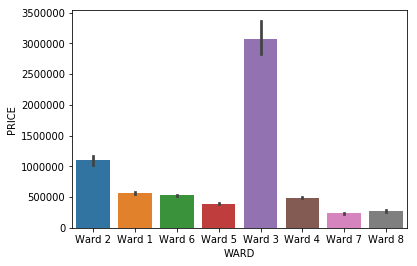

In [32]:
#survival status by sex
sns.barplot('WARD', 'PRICE', data=test_df)

In [41]:
test_df.groupby(['WARD','ZIPCODE'])['PRICE'].mean()

WARD    ZIPCODE
Ward 1  20001.0    4.909280e+05
        20008.0             NaN
        20009.0    6.381145e+05
        20010.0    5.077094e+05
Ward 2  20001.0    5.982604e+05
        20004.0    4.755701e+05
        20005.0    2.813137e+06
        20006.0    1.959069e+05
        20007.0    1.188679e+06
        20008.0    1.429044e+06
        20009.0    5.860259e+05
        20036.0    4.015452e+05
        20037.0    6.124601e+05
        20052.0    5.378571e+05
Ward 3  20007.0    7.644100e+05
        20008.0    7.607004e+05
        20015.0    7.458121e+05
        20016.0    5.914537e+06
        20392.0    3.489169e+05
Ward 4  20008.0    1.420000e+06
        20010.0    4.912756e+05
        20011.0    4.371637e+05
        20012.0    4.755227e+05
        20015.0    7.942437e+05
Ward 5  20001.0    5.234158e+05
        20002.0    3.596616e+05
        20011.0    2.702951e+05
        20017.0    4.087405e+05
        20018.0    3.691101e+05
Ward 6  20001.0    4.910648e+05
        20002.0    5.316

In [43]:
test_df.isnull().sum()

BATHRM           0
NUM_UNITS    52261
ROOMS            0
BEDRM            0
PRICE        60741
ZIPCODE          1
WARD             1
QUADRANT       237
dtype: int64

In [47]:
test_df

,BATHRM,NUM_UNITS,ROOMS,BEDRM,PRICE,ZIPCODE,WARD,QUADRANT
0,4,2.0,8,4,1095000.0,20009.0,Ward 2,NW
1,3,2.0,11,5,NaN,20009.0,Ward 2,NW
2,3,2.0,9,5,2100000.0,20009.0,Ward 2,NW
3,3,2.0,8,5,1602000.0,20009.0,Ward 2,NW
4,2,1.0,11,3,NaN,20009.0,Ward 2,NW
5,3,1.0,10,5,1950000.0,20009.0,Ward 2,NW
6,1,2.0,5,2,NaN,20009.0,Ward 2,NW
7,3,2.0,8,4,1050000.0,20009.0,Ward 2,NW
8,3,2.0,7,3,1430000.0,20009.0,Ward 2,NW
9,1,1.0,6,2,NaN,20009.0,Ward 2,NW


In [51]:
jump = test_df.groupby(['WARD'])['PRICE']

In [52]:
jump